# Intro

This is a meta-analysis (a study of multiple studies) with these objetives:
*   Understand the relationship between transactional leadership (TL) and follower performance
*   Use social exchange theory (SET) and self-determination theory (SDT) to understand double-edged consequences of leadership styles.


# Hypotheses

The authors want to prove the following are true (*my interpretations in parenthesis*):
*   Hypothesis 1: LMX mediates the negative relationship between MBEA and task performance (Hypothesis 1a) as well as the negative relationship between MBEA and contextual performance (Hypothesis 1b).

(*In other words: micromanagement results in bad performance, specially if people dont have great relationships with their managers*)

*   Hypothesis 2: Empowerment mediates the negative relationship between MBEA and task performance (Hypothesis 2a) as well as the negative relationship between MBEA and contextual performance (Hypothesis 2b).

(*In other words: micromanagement results in bad performance, because micromanagers prevent staff from feeling empowered/autonomous/self-motivated*)

*   Hypothesis 3: LMX mediates the negative relationship between MBEP and task performance (Hypothesis 3a) as well as the negative relationship between MBEP and contextual performance (Hypothesis 3b).
*   Hypothesis 4: Empowerment mediates the negative relationship between MBEP and task performance (Hypothesis 4a) as well as the negative relationship between MBEP and contextual performance (Hypothesis 4b).
*   Hypothesis 5: LMX mediates the positive relationship between contingent reward and task performance (Hypothesis 5a) as well as the positive relationship between contingent reward and contextual performance (Hypothesis 5b).
*   Hypothesis 6: Empowerment mediates the negative relationship between contingent reward and task performance (Hypothesis 6a) as well as the negative relationship between contingent reward and contextual performance (Hypothesis 6b).

# Results

There are three sections here, for each of the three types of statistical analyses on this paper: *metanalytic correlations, mediations, and indirect effects*. My intent is to compare the tables reported on the original study, to those same ones recreated in excel (in a more colorful fashion), and Python (for the latter two only). This is for visualization purposes, as well as to better understand the results in a non-academic way.

## Correlations

The original meta-analytic correlation matrix, as reported in APA style, is hard to read or interpret:

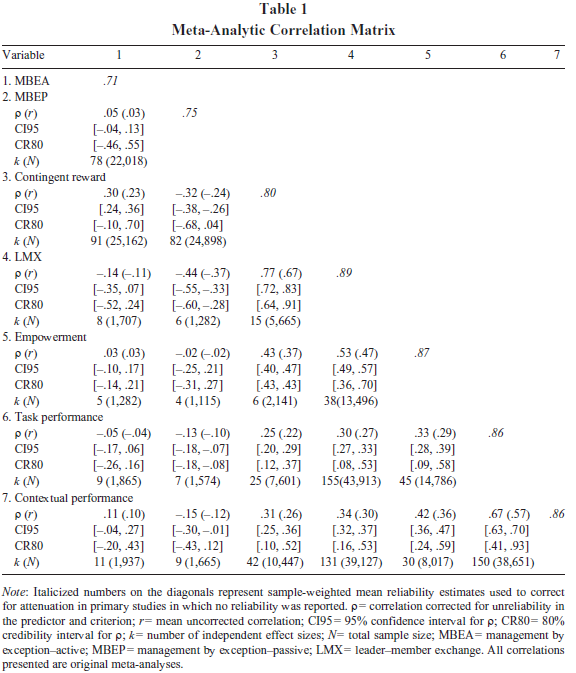

If you are not an academic, a simple excel table, or heatmap, will do. Since we are only talking about a few correlations, it is not a lot of work to manually arrange the numbers (a simple copy-paste will not work).

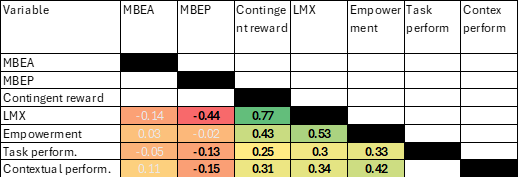

This way, we can easily spot the highest (0.77; contingent reward and LMX) and lowest (-0.44; MBEP and LMX) correlations. Also, some of the MBEA correlations are way too low (e.g., 0.03 with empowerment; -0.05 with task performance), and as such have no statistical significance (grey font, as opposed to **black bold** font)

Ultimately, if we zoom out even more, beyond individual coefficients, I could conclude that **both types of management do not seem to work out well** when it comes to follower performance, in that, higher macro and micro-management correlate with lower performance (both types). Alternatively, **rewards do make a difference**: it seems like I am more likely to perform better the more rewards I get. Of course, rewards are [almost always] tangible, for example monetary rewards. This is very different from an active or passive management style by my boss, which sounds like a more subjective, open to interpretation, and prone to misperception, leadership style.

## Mediations

Once again, APA-style tables are not the great when it comes to interpreting data and results, as those are meant to serve different purposes:

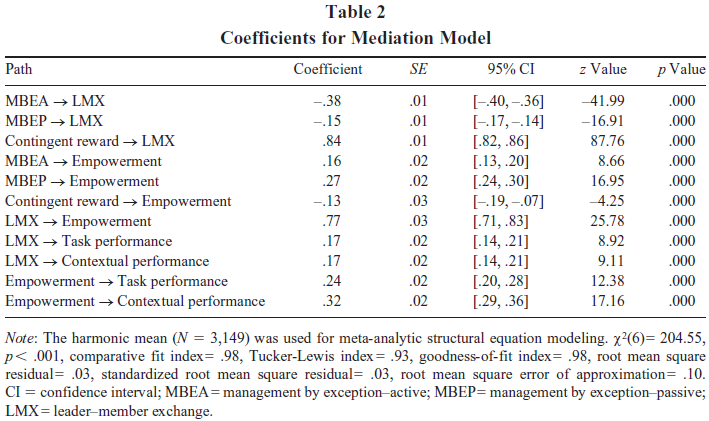

A more visual way is displayed below.

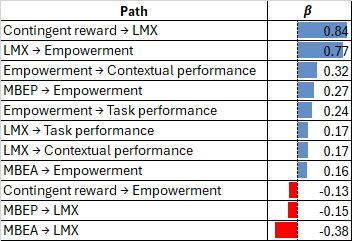

### Mediation model dataframe

In [7]:
# Also, here´s the Python version:
path = "https://raw.githubusercontent.com/miguelsanchezrivas/I-O-Psych-viz/main/2024-02-03%20Young_et_al_(2021)/Mediation%20model"
mediation_model = pd.read_csv(path, sep='\t')
mediation_model.head(3)

,Path,β
0,Contingent reward → LMX,0.84
1,LMX → Empowerment,0.77
2,Empowerment → Contextual performance,0.32


In [28]:
import plotly
import plotly.express as px

In [50]:
# Take the absolute values of β, to ensure all values are charted
mediation_model['β_abs'] = mediation_model['β'].abs()

# Assign colors based on the direction of β
mediation_model['Color'] = mediation_model['β'].apply(lambda x: 'red' if x < 0 else 'blue')

# Create a tree chart with custom colors
fig = px.treemap(mediation_model, path=['Path'], values='β_abs', color='Color', color_discrete_map={'red': 'red', 'blue': 'blue'})

# Show chart
fig.show()

## Indirect effects

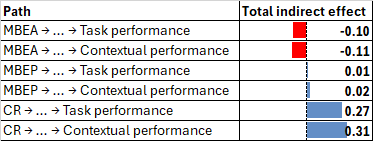

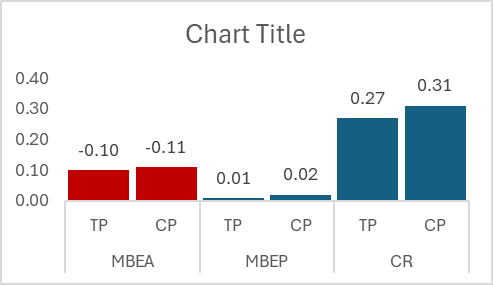

Rewards´ effects are or larger magnitude (0.15, 0.14), than those of active/passive management

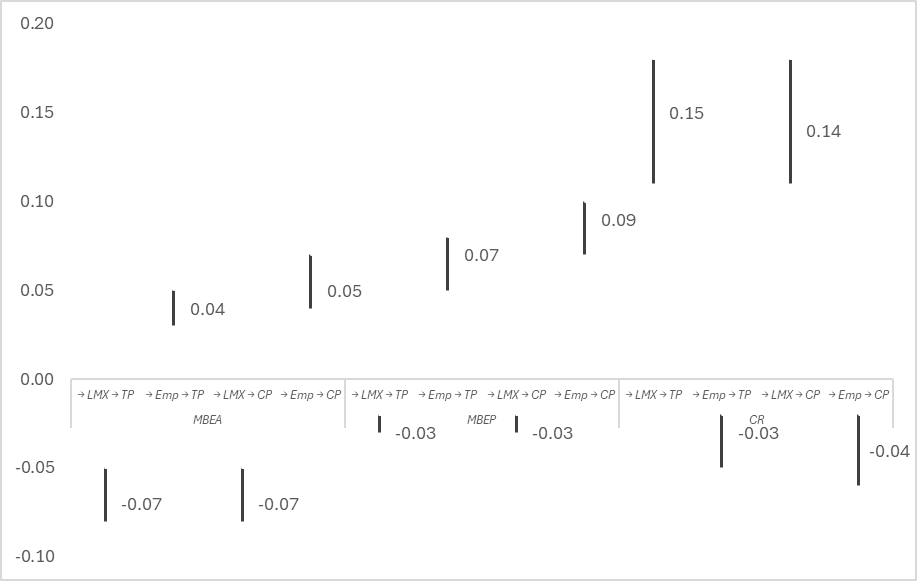

### Indirect effects dataframe

In [3]:
path = "https://raw.githubusercontent.com/miguelsanchezrivas/I-O-Psych-viz/main/2024-02-03%20Young_et_al_(2021)/Indirect%20Effects%20for%20Mediation%20Model"
import pandas as pd
import numpy as np

In [4]:
Indirect_effects = pd.read_csv(path, sep='\t')
Indirect_effects.head(2)

,Mechanism,Point Estimate,95% MC low,95% MC high,H,Dirección de H,Soporte
0,MBEA-LMX-Task performance,-0.07,-0.08,-0.05,1a,-,Si (marginal)
1,MBEA-Empowerment-Task performance,0.04,0.03,0.05,2a,-,No


In [6]:
filtered_df = Indirect_effects[Indirect_effects['Mechanism '].str.contains('Total indirect effect')]

# Extracting the relevant columns
filtered_df = filtered_df[['Mechanism ', 'Point Estimate']]

# Renaming the columns
filtered_df.columns = ['Path', 'Total indirect effect']

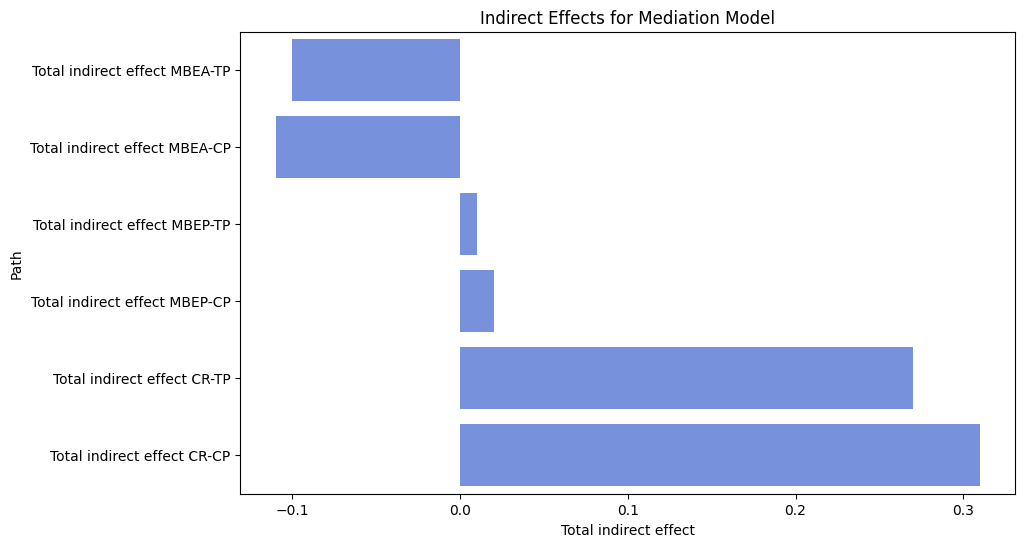

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame =  filtered_df

# Set the color palette
sns.set_palette("coolwarm")

# Create a bar plot with the 'Path' and 'Total indirect effect' columns
plt.figure(figsize=(10, 6))
sns.barplot(x='Total indirect effect', y='Path', data=filtered_df, orient='h')

# Set labels and title
plt.xlabel('Total indirect effect')
plt.ylabel('Path')
plt.title('Indirect Effects for Mediation Model')

# Show the plot
plt.show()

#Glossary
*   Transactional leadership (TL)
*   Leader–member exchange (LMX)
*   Management by exception–active (MBEA)
*   Management by exception–passive (MBEP)
*   Contingent reward (CR)
*   self-determination theory (SDT)
*   social exchange theory (SET)
*   Empowerment
*   Task performance
*   Contextual performance

# Questions

We also found a positive relationship between LMX and empowerment (β =
.77, p < .05).

#Reference:
Young, H. R., Glerum, D. R., Joseph, D. L. and McCord, M. A. (2021), “A meta-analysis of transactional leadership and follower performance: Double-edged effects of LMX and empowerment”, Journal of Management, Vol. 47 No. 5, pp. 1255-1280.